### Importing the Packages

In [99]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
from keplergl import KeplerGl
from matplotlib import pyplot as plt
import seaborn as sns

### Data Information 
The Data has been taken from Natural Resources Conservation Service Soils (United States Department of Agriculture) - [Data URL](https://www.nrcs.usda.gov/wps/portal/nrcs/detail/soils/survey/?cid=nrcs142p2_054164#data_tables)

**Data Description**
1. `RaCA_data_columns_expl` - This data gives the information about the columns of the general location and pedons dataset and most importantly the breakdown of the RaCA side ID code 
1. `RaCA_general_location` - 
1. `RaCA_samples`
1. `RaCA_SOC_pedons`

Pedons - Pedons are three-dimensional bodies of soil with lateral dimensions large enough to permit the study of horizon shapes and relations. [Here](https://www.sciencedirect.com/topics/earth-and-planetary-sciences/pedon)

**RaCA site ID - Code**\
RaCA site ID = CxxyyLzz 
* C = placeholder character (C,A,X or F)
* xx = RaCA Region/old MO number (01 - 18)
* yy = statistical group # for MO (number varies by region)
* L = land use/land cover type (C=Cropland, F=Forest land, P=Pastureland, R=Rangeland, W=Wetland, and X=CRP)
* zz = Plot # within the group


In [63]:
# Importing and reading the files from the data folder 

samples_df = pd.read_csv('data\RaCA_samples.csv')
pedons_df = pd.read_csv('data\RaCA_SOC_pedons.csv')
general_location_df = pd.read_csv('data\RaCa_general_location.csv')

## Requirement 1

In [64]:
# Checking the Columns of the data 

print(samples_df.columns)
print(pedons_df.columns)
print(general_location_df.columns)

Index(['samp', 'sample.id', 'TOP', 'BOT', 'hzn_desgn', 'rcasiteid', 'pedon_no',
       'MO', 'MOGr', 'hor_top', 'hor_bot', 'fragvolc', 'Bulkdensity',
       'SOC_pred1', 'BD1', 'upedonid', 'upedon', 'LU', 'MOGrLU', 'hzname',
       'model_desg1', 'texture', 'BDmeasured', 'BDmethod', 'Lab.Sample.No',
       'lab_proj_name', 'submit_proj_name', 'user_site_id', 'smp_id',
       'lay_field_label1', 'lay_field_label2', 'lay_field_label3',
       'lay_depth_to_top', 'lay_depth_to_bottom', 'horizon_designation',
       'natural_key', 'lay_id', 'adod', 'c_tot_ncs', 'n_tot_ncs', 's_tot_ncs',
       'caco3', 'efferv_1nhcl', 'M', 'Model_desg', 'Texture', 'Measure_BD',
       'Model_BD'],
      dtype='object')
Index(['upedonid', 'MO', 'MOGr', 'LU', 'MOGrLU', 'rcasiteid', 'upedon',
       'Sample_count', 'SOCstock5', 'SOCstock30', 'SOCstock100',
       'total_thickness', 'SOC_count', 'Lab_count', 'Depth_to_R',
       'Non-R_SampleCount', 'SOC_thickness', 'USE'],
      dtype='object')
Index(['RaCA_I

In [65]:
# Making the List of Columns to Understand the Unique Identifier for both the datasets (Will be helpful for merging as well)
# Notes has been made

identifiers_samples = ['samp', 'sample.id', 'rcasiteid', 'pedon_no', 'upedonid', 'upedon']
identifiers_pedons = ['upedonid', 'rcasiteid', 'upedon']

In [66]:
samples_df[identifiers_samples].head(3)

,samp,sample.id,rcasiteid,pedon_no,upedonid,upedon
0,C0101F011-1,1.0,C0101F01,1,C0101F01-1,C0101F011
1,C0101F011-2,1.0,C0101F01,1,C0101F01-1,C0101F011
2,C0101F011-3,2.0,C0101F01,1,C0101F01-1,C0101F011


* `samp` - Looks the most informative, with having the rca site id (C0101F01), along with the pedon number (01) and the sample number (-1)*
* `samp` - XXXXXXXXY-Z (Where X is the rca site ID, y is the pedon number of the site, and Z is the sample number)
* We can use `upedon` and `samp` columns and remove the others

In [67]:
pedons_df.loc[pedons_df['upedon'] == 'C0101F011'][identifiers_pedons]

,upedonid,rcasiteid,upedon
43,C0101F01-1,C0101F01,C0101F011


* `upedon` - Unique RaCA pedon ID contains the site and pedon within the site
* `upedonid` - This column has lots of typos, sometimes a hyphen '-' is used sometimes an underscore '_' 

In [68]:
pedons_df.drop(columns=['upedonid', 'rcasiteid', ''], inplace=True)

In [69]:
pedons_df.head()

,MO,MOGr,LU,MOGrLU,upedon,Sample_count,SOCstock5,SOCstock30,SOCstock100,total_thickness,SOC_count,Lab_count,Depth_to_R,Non-R_SampleCount,SOC_thickness,USE
0,1,108,P,0108P,A0108P921,5,15.126360,76.022073,100.113941,150,4,5,NaN,5,100,100.0
1,1,116,P,0116P,A0116P901,4,35.481720,95.965557,242.002573,100,4,4,NaN,4,100,100.0
2,1,116,P,0116P,A0116P941,3,36.827055,104.147733,293.079581,100,3,3,NaN,3,100,100.0
3,1,116,X,0116X,A0116X971,4,6.950620,29.854781,69.735244,100,4,4,NaN,4,100,100.0
4,1,120,R,0120R,A0120R931,5,13.072982,53.249971,116.996856,68,4,5,68.0,4,68,100.0


plt.figure(figsize=(16,7))
sns.heatmap(pedons_df.corr(), annot=True, linewidths = 0.1, cmap="YlGnBu")
plt.show()

In [92]:
pedons_df.isna().any()

MO                   False
MOGr                 False
LU                   False
MOGrLU               False
upedon               False
Sample_count         False
SOCstock5             True
SOCstock30            True
SOCstock100           True
total_thickness      False
SOC_count            False
Lab_count            False
Depth_to_R            True
Non-R_SampleCount    False
SOC_thickness        False
USE                   True
Land_Use             False
dtype: bool

<AxesSubplot:>

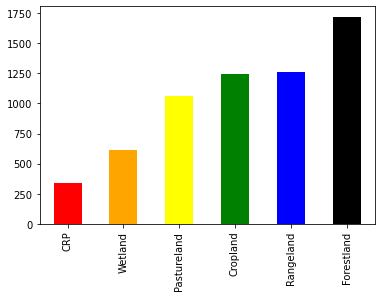

In [97]:
# Fetching the Land Use from the RaCA Side Id from upedon column and storing in a new column
pedons_df['Land_Use'] = pedons_df['upedon'].apply(lambda x : x[5])

# Creating a dictionary to decode the Letter for the Land Use
land_use_dict = dict(C='Cropland', F='Forestland', P='Pastureland', R='Rangeland', W='Wetland', X='CRP')

# Replacing the LandUse with the Letters. 
pedons_df.replace({'Land_Use' : land_use_dict}, inplace=True)

#Plotting the Land Use
pedons_df['Land_Use'].value_counts().sort_values().plot(kind = 'bar', color=['red','orange','yellow','green','blue','black'])

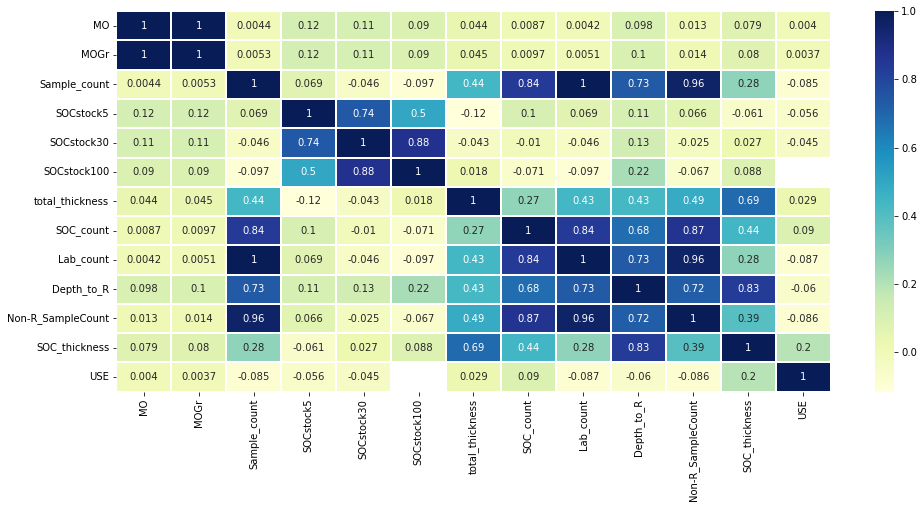

In [101]:
plt.figure(figsize=(16,7))
sns.heatmap(pedons_df.corr(), annot=True, linewidths = 0.1, cmap="YlGnBu")
plt.show()

**Based on the plot, we can say Forestlands had the most data**

In [91]:
pedons_df['MO'].nunique

<bound method IndexOpsMixin.nunique of 0        1
1        1
2        1
3        1
4        1
        ..
6231    18
6232    18
6233    18
6234    18
6235    11
Name: MO, Length: 6236, dtype: int64>

In [88]:
pedons_df.describe()

,MO,MOGr,Sample_count,SOCstock5,SOCstock30,SOCstock100,total_thickness,SOC_count,Lab_count,Depth_to_R,Non-R_SampleCount,SOC_thickness,USE
count,6236.000000,6236.000000,6236.000000,6228.000000,6190.000000,5964.000000,6236.000000,6236.000000,6236.000000,1168.000000,6236.000000,6236.000000,6228.000000
mean,9.095253,916.819756,4.895125,29.767982,95.386292,182.699740,115.626363,4.368345,4.895606,54.381849,4.717287,97.389513,96.880218
std,4.922029,491.692353,1.415087,42.336622,149.524679,416.611524,46.176735,1.270535,1.414953,30.587250,1.502982,36.133129,14.939161
min,1.000000,101.000000,1.000000,0.033385,0.178608,0.178608,5.000000,1.000000,1.000000,2.000000,1.000000,1.000000,5.000000
25%,5.000000,507.000000,4.000000,7.845821,31.198913,52.761252,100.000000,4.000000,4.000000,31.000000,4.000000,89.000000,100.000000
50%,9.000000,910.000000,5.000000,14.680179,51.831722,86.546488,100.000000,4.000000,5.000000,48.000000,5.000000,100.000000,100.000000
75%,13.000000,1311.000000,6.000000,27.889351,91.779348,149.692946,150.000000,5.000000,6.000000,73.000000,6.000000,106.000000,100.000000
max,18.000000,1812.000000,11.000000,402.295670,1268.243420,4114.177873,261.000000,10.000000,11.000000,202.000000,11.000000,250.000000,100.000000


## Requirement 2

In [24]:
pedons_df.isna().any()

upedonid             False
MO                   False
MOGr                 False
LU                   False
MOGrLU               False
rcasiteid            False
upedon               False
Sample_count         False
SOCstock5             True
SOCstock30            True
SOCstock100           True
total_thickness      False
SOC_count            False
Lab_count            False
Depth_to_R            True
Non-R_SampleCount    False
SOC_thickness        False
USE                   True
dtype: bool

In [35]:
samples_df['upedon'].head()

0    C0101F011
1    C0101F011
2    C0101F011
3    C0101F012
4    C0101F012
Name: upedon, dtype: object

In [37]:
samples_df['upedon'].tail()

38200    C0508C011
38201    C0508C011
38202    C0508C011
38203    C0508C011
38204    C0508C012
Name: upedon, dtype: object

In [40]:
samples_df.shape

(38205, 48)

In [41]:
pedons_df.shape

(6236, 18)

In [39]:
join_df = samples_df.merge(pedons_df, on='upedon')
join_df

,samp,sample.id,TOP,BOT,hzn_desgn,rcasiteid_x,pedon_no,MO_x,MOGr_x,hor_top,...,SOCstock5,SOCstock30,SOCstock100,total_thickness,SOC_count,Lab_count,Depth_to_R,Non-R_SampleCount,SOC_thickness,USE
0,C0101F011-1,1.0,0,5,oa,C0101F01,1,1,101,0,...,169.511025,1076.864591,3805.801642,100,3,3,NaN,3,100,100.0
1,C0101F011-2,1.0,5,22,oa,C0101F01,1,1,101,0,...,169.511025,1076.864591,3805.801642,100,3,3,NaN,3,100,100.0
2,C0101F011-3,2.0,22,100,oe,C0101F01,1,1,101,22,...,169.511025,1076.864591,3805.801642,100,3,3,NaN,3,100,100.0
3,C0101W011-1,16.0,0,5,a,C0101W01,1,1,101,0,...,338.654705,1205.698308,3853.560256,100,4,4,NaN,4,100,100.0
4,C0101W011-2,17.0,5,25,oe1,C0101W01,1,1,101,7,...,338.654705,1205.698308,3853.560256,100,4,4,NaN,4,100,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7675,C0508C011-1,37970.0,0,5,ap1,C0508C01,1,5,508,0,...,9.128381,43.805015,75.146006,100,5,5,NaN,5,100,100.0
7676,C0508C011-2,37971.0,5,22,ap2,C0508C01,1,5,508,5,...,9.128381,43.805015,75.146006,100,5,5,NaN,5,100,100.0
7677,C0508C011-3,37972.0,22,58,bt,C0508C01,1,5,508,22,...,9.128381,43.805015,75.146006,100,5,5,NaN,5,100,100.0
7678,C0508C011-4,37973.0,58,78,bc,C0508C01,1,5,508,58,...,9.128381,43.805015,75.146006,100,5,5,NaN,5,100,100.0


In [15]:
general_location_df['geometry'] = [Point(x,y) for x,y in zip(general_location_df['Gen_lat'], general_location_df['Gen_long'])]

In [4]:
general_location_df.head()

,RaCA_Id,Gen_lat,Gen_long,geometry
0,C0107F02,48.27,-124.65,POINT (48.27 -124.65)
1,C0104F05,47.92,-124.52,POINT (47.92 -124.52)
2,C0104F09,47.90,-124.50,POINT (47.9 -124.5)
3,C0120P02,42.80,-124.49,POINT (42.8 -124.49)
4,C0104F03,46.80,-124.48,POINT (46.8 -124.48)


In [5]:
general_location_gdf = gpd.GeoDataFrame(data=general_location_df, geometry=general_location_df['geometry'])
general_location_gdf

,RaCA_Id,Gen_lat,Gen_long,geometry
0,C0107F02,48.27,-124.65,POINT (48.270 -124.650)
1,C0104F05,47.92,-124.52,POINT (47.920 -124.520)
2,C0104F09,47.90,-124.50,POINT (47.900 -124.500)
3,C0120P02,42.80,-124.49,POINT (42.800 -124.490)
4,C0104F03,46.80,-124.48,POINT (46.800 -124.480)
...,...,...,...,...
6400,C0606W02,39.46,-110.77,POINT (39.460 -110.770)
6401,C0604W05,39.21,-110.99,POINT (39.210 -110.990)
6402,C0118F04,44.75,-122.55,POINT (44.750 -122.550)
6403,C0114F06,44.46,-122.88,POINT (44.460 -122.880)


In [6]:
general_location_gdf.set_crs(epsg=4326)

,RaCA_Id,Gen_lat,Gen_long,geometry
0,C0107F02,48.27,-124.65,POINT (48.270 -124.650)
1,C0104F05,47.92,-124.52,POINT (47.920 -124.520)
2,C0104F09,47.90,-124.50,POINT (47.900 -124.500)
3,C0120P02,42.80,-124.49,POINT (42.800 -124.490)
4,C0104F03,46.80,-124.48,POINT (46.800 -124.480)
...,...,...,...,...
6400,C0606W02,39.46,-110.77,POINT (39.460 -110.770)
6401,C0604W05,39.21,-110.99,POINT (39.210 -110.990)
6402,C0118F04,44.75,-122.55,POINT (44.750 -122.550)
6403,C0114F06,44.46,-122.88,POINT (44.460 -122.880)


In [7]:
general_location_gdf = general_location_gdf[['RaCA_Id','geometry']]

In [8]:
general_location_gdf.dtypes

RaCA_Id       object
geometry    geometry
dtype: object

<AxesSubplot:>

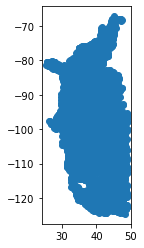

In [9]:
general_location_gdf.plot()

In [16]:
base_map_1 = KeplerGl(height=600, width=800)
base_map_1.add_data(data=general_location_gdf.copy(), name = 'area_of_interest')
base_map_1.save_to_html()

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter
Map saved to keplergl_map.html!


In [11]:
from keplergl import KeplerGl
map_1 = KeplerGl()
map_1

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl()